In this project Iam trying to analyze the Health_insurance_cost dataset and through deep data analysis and visualisation get the deep insights from the data. Also create a machine learning model that can predict the health_insurance_price

The dataset have  these columns:  'age', 'gender', 'BMI', 'Children', 'smoking_status', 'location','health_insurance_price'.

In [1]:
#importing variouslibraries  
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import the Health_insurance_cost dataset
health=pd.read_excel(r"C:\Users\hp\Downloads\Health_insurance_cost (1).xlsx")
health.shape

(1338, 7)

In [276]:
health.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [275]:
health

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [3]:
health.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
We have missing data in target (dependent variable) that have to be removed.

In [4]:
# removing the health_insurance_price missing records
health1=health.dropna(subset=['health_insurance_price'])
health1.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

In [5]:
health1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


In [22]:
cat_col=[]
for i in health1.columns:
    if health1[i].dtypes==object:
        cat_col.append(i)
cat_col

['gender', 'smoking_status', 'location']

In [25]:
for i in cat_col:
    print(i)
    print(health[i].unique())
    print(health[i].value_counts())
    print('*'*30)

gender
['female' 'male']
male      676
female    662
Name: gender, dtype: int64
******************************
smoking_status
['yes' 'no']
no     1064
yes     274
Name: smoking_status, dtype: int64
******************************
location
['southwest' 'southeast' 'northwest' 'northeast']
southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64
******************************


In [26]:
health1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1308.0,39.164373,14.063732,18.0000,26.00000,39.000,51.000000,64.00000
BMI,1313.0,30.631158,6.105017,15.9600,26.20000,30.305,34.580000,53.13000
Children,1336.0,1.094311,1.206138,0.0000,0.00000,1.000,2.000000,5.00000
health_insurance_price,1336.0,13268.527719,12112.797724,1121.8739,4744.32505,9382.033,16604.302645,63770.42801


In [27]:
health1.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_11572\2444188586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  health1.corr()


,age,BMI,Children,health_insurance_price
age,1.000000,0.110553,0.041165,0.298221
BMI,0.110553,1.000000,0.010542,0.197359
Children,0.041165,0.010542,1.000000,0.067483
health_insurance_price,0.298221,0.197359,0.067483,1.000000


# Exploratory Data Analysis

Text(0.5, 1.0, 'Male vs Female')

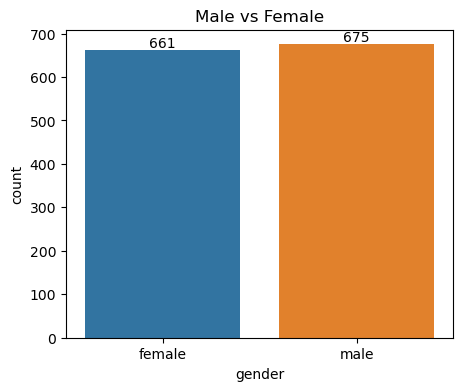

In [102]:
plt.figure(figsize=(5,4))
f=sns.countplot(data=health1,x='gender')
for i in f.containers:
    f.bar_label(i)
plt.title('Male vs Female')

<Axes: xlabel='age', ylabel='Count'>

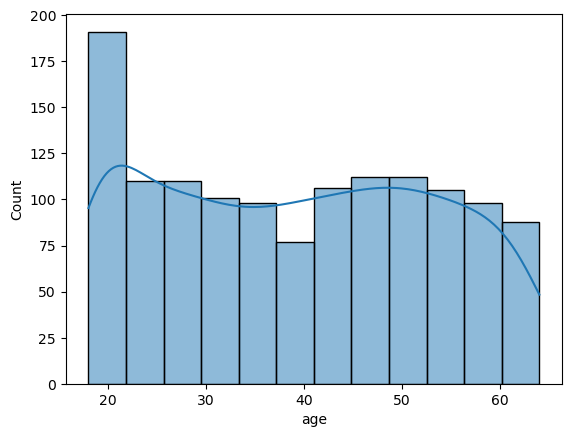

In [41]:
sns.histplot(health1['age'],kde=True)

In [71]:
f=px.box(health1,x='age',width=400,height=400)
f.show()

<Axes: xlabel='BMI', ylabel='Count'>

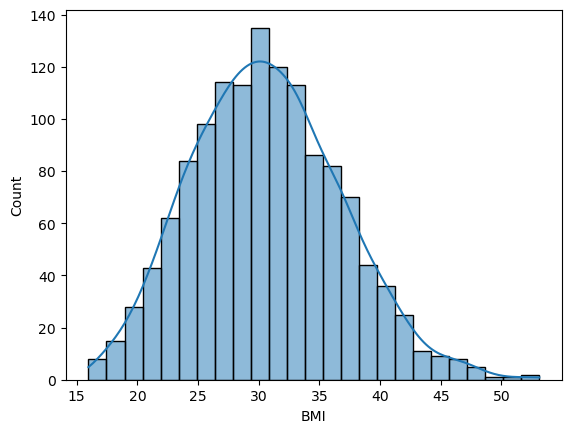

In [42]:
sns.histplot(health1['BMI'],kde=True)

In [37]:
f=px.box(health1,y='BMI',width=400,height=400)
f.show()

<Axes: xlabel='health_insurance_price', ylabel='Count'>

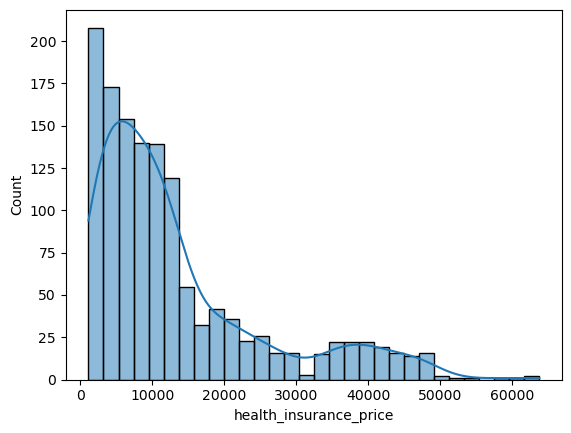

In [43]:
sns.histplot(health1['health_insurance_price'],kde=True)

In [40]:
f=px.box(health1,x='health_insurance_price',width=600,height=400)
f.show()

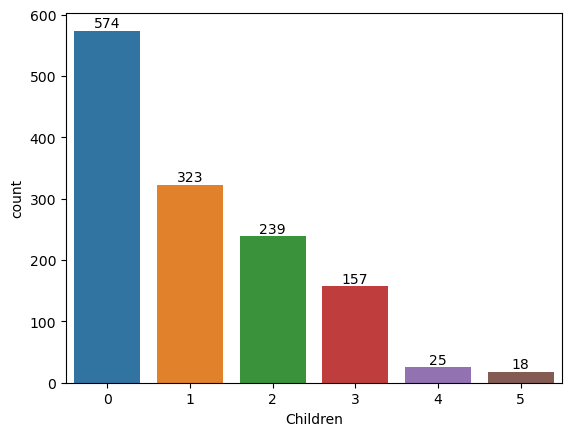

In [82]:
f=sns.countplot(data=health1,x='Children')
for i in f.containers:
    f.bar_label(i)

In [132]:
f=px.bar(health1,x='Children',y='health_insurance_price',color='Children')
f.show()

Text(0.5, 1.0, 'Location')

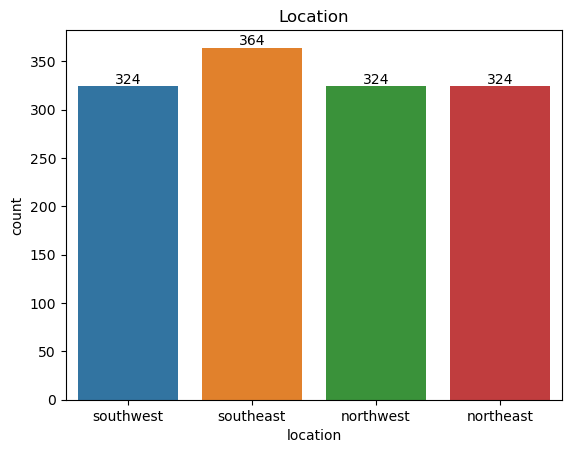

In [92]:
f=sns.countplot(data=health1,x='location')
for i in f.containers:
    f.bar_label(i)
plt.title('Location')

In [134]:
f=px.bar(health1,x='location',y='health_insurance_price')
f.show()

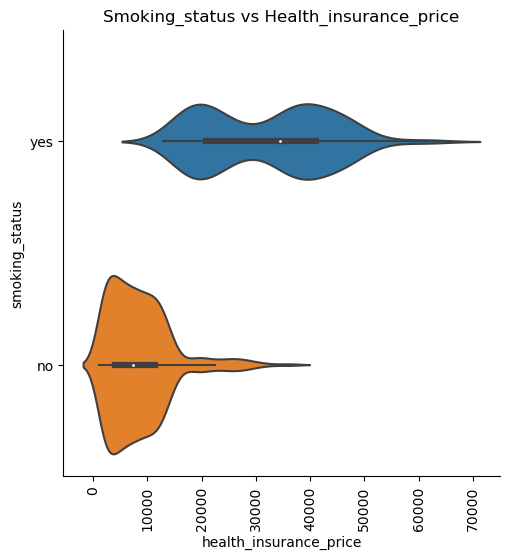

In [89]:
sns.catplot(data=health1,x='health_insurance_price',y='smoking_status',kind='violin')
plt.xticks(rotation=90)
plt.title('Smoking_status vs Health_insurance_price')
plt.show()

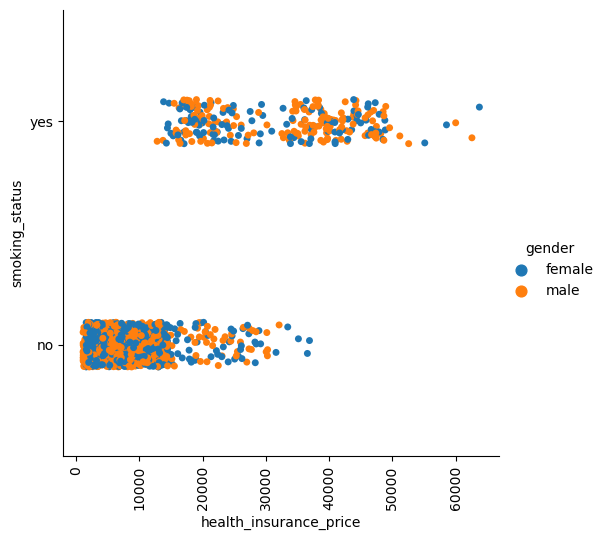

In [70]:
sns.catplot(data=health1,x='health_insurance_price',y='smoking_status',hue='gender')
plt.xticks(rotation=90)
plt.show()

For male and female smoking people have high health_insurance_price

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

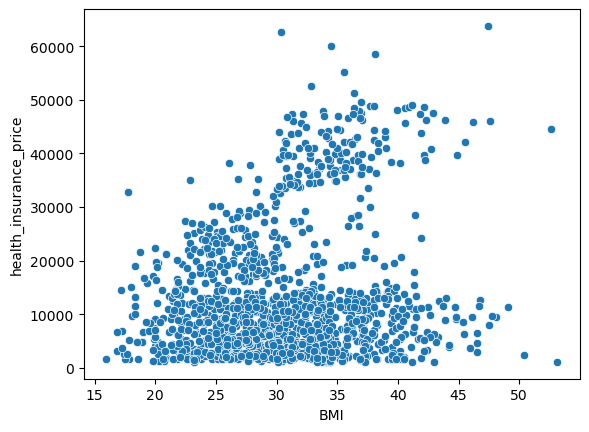

In [103]:
sns.scatterplot(data=health1,x='BMI',y='health_insurance_price')

<Axes: xlabel='age', ylabel='health_insurance_price'>

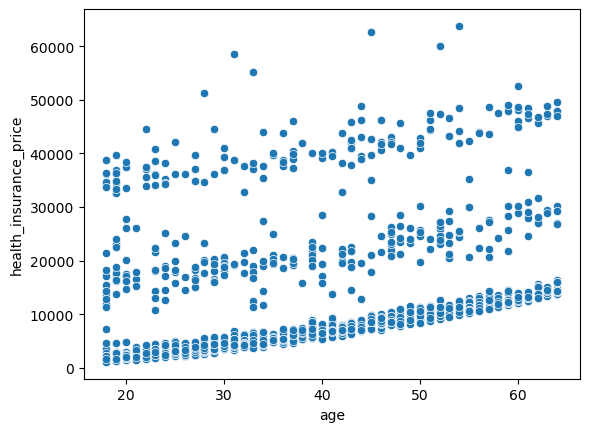

In [104]:
sns.scatterplot(data=health1,x='age',y='health_insurance_price')

In [97]:
f=px.box(health1,color='smoking_status',y='health_insurance_price',facet_col='gender')
f.show()

We have almost equal number of male and female in the datastet.
Age and and BMI of them distributed normally where as health_insurance_price somewhat rightely skewed.
For both male and Female smoking people has high health_insurance_price

Now let's create a feature as bodytype and analyze how people bodytype differes

In [ ]:
'''
under 18.5 – This is described as underweight.
between 18.5 and 24.9 – This is described as the 'healthy range'.
between 25 and 29.9 – This is described as overweight.
between 30 and 39.9 – This is described as obesity.
40 or over – This is described as severe obesity.
'''

In [105]:
# let's create a func that decides a BMI and it's bodytype
def bmi(n):
    
    if n<18.5:
        d='underweight'
    elif n<=24.9:
        d='underweight'
    elif n<=29.9:
        d='overweight'
    elif n<=39.9:
        d='obesity'
    else:
        d='severe obesity'
    return d 

In [106]:
# apply method 
health1.BMI.apply(bmi)

0       severe obesity
1              obesity
2              obesity
3          underweight
4           overweight
             ...      
1333           obesity
1334           obesity
1335           obesity
1336        overweight
1337        overweight
Name: BMI, Length: 1336, dtype: object

In [107]:
health1['Bodytype']=health1.BMI.apply(bmi)
health1

C:\Users\hp\AppData\Local\Temp\ipykernel_11572\3957333329.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,gender,BMI,Children,smoking_status,location,health_insurance_price,Bodytype
0,19.0,female,NaN,0,yes,southwest,16884.92400,severe obesity
1,18.0,male,33.770,1,no,southeast,1725.55230,obesity
2,28.0,male,33.000,3,no,southeast,4449.46200,obesity
3,33.0,male,22.705,0,no,northwest,21984.47061,underweight
4,32.0,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,obesity
1334,18.0,female,31.920,0,no,northeast,2205.98080,obesity
1335,18.0,female,36.850,0,no,southeast,1629.83350,obesity
1336,21.0,female,25.800,0,no,southwest,2007.94500,overweight


Text(0.5, 1.0, 'Bodytype')

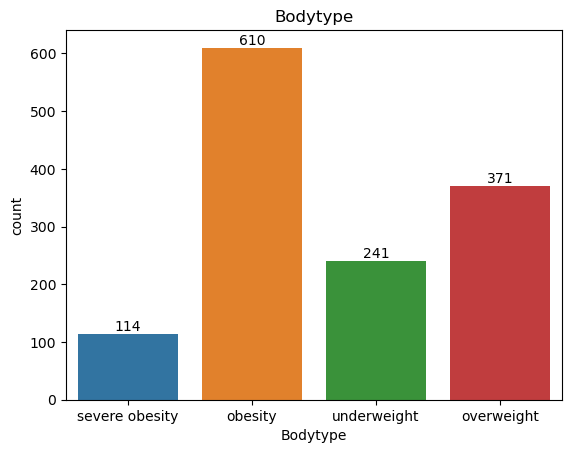

In [113]:
f=sns.countplot(data=health1,x='Bodytype')
for i in f.containers:
    f.bar_label(i)
plt.title('Bodytype')

In [111]:
f=px.box(health1,y='health_insurance_price',facet_col='Bodytype',color='gender')
f.show()

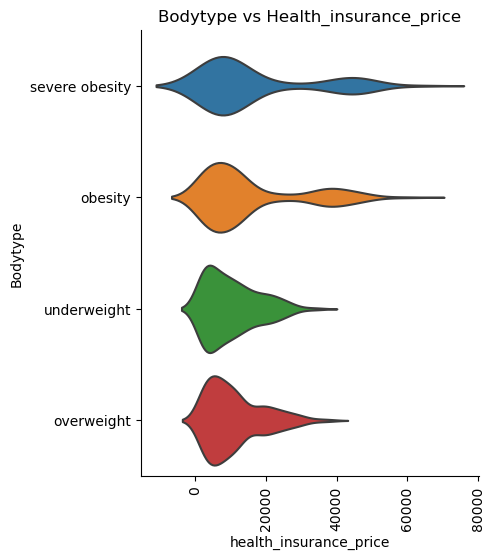

In [112]:
sns.catplot(data=health1,x='health_insurance_price',y='Bodytype',kind='violin',inner=None)
plt.xticks(rotation=90)
plt.title('Bodytype vs Health_insurance_price')
plt.show()

It's clear from the visualization that health_insurance decreases from severe obesity,obesity and then overweight 

In [114]:
f=px.box(health1,y='health_insurance_price',facet_col='Bodytype',color='smoking_status')
f.show()

Health_insurance price increases to too high when value of smoking status is 'yes' ,also it increases in a high level for obsese people

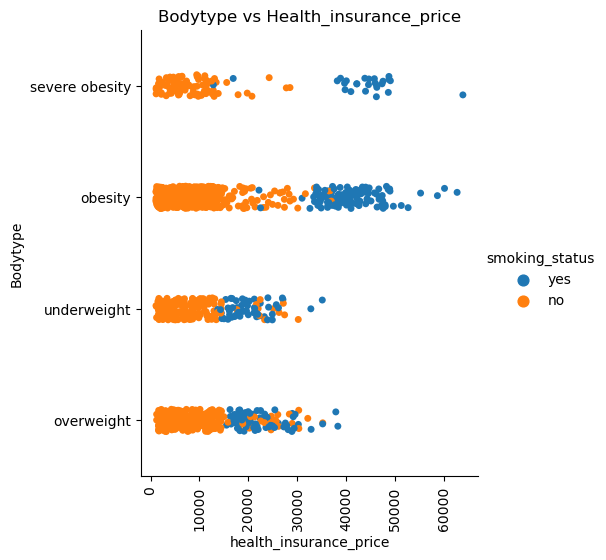

In [117]:
sns.catplot(data=health1,x='health_insurance_price',y='Bodytype',hue='smoking_status')
plt.xticks(rotation=90)
plt.title('Bodytype vs Health_insurance_price')
plt.show()

From the above figure it's clear that Bodytype obesity and smoking habit 'yes' will correspond to high insurance price

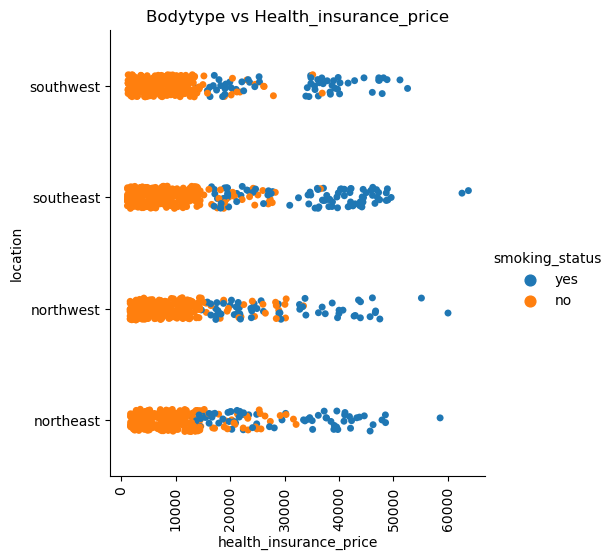

In [122]:
sns.catplot(data=health1,x='health_insurance_price',y='location',hue='smoking_status')
plt.xticks(rotation=90)
plt.title('Bodytype vs Health_insurance_price')
plt.show()

In [123]:
health1

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,Bodytype
0,19.0,female,NaN,0,yes,southwest,16884.92400,severe obesity
1,18.0,male,33.770,1,no,southeast,1725.55230,obesity
2,28.0,male,33.000,3,no,southeast,4449.46200,obesity
3,33.0,male,22.705,0,no,northwest,21984.47061,underweight
4,32.0,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,obesity
1334,18.0,female,31.920,0,no,northeast,2205.98080,obesity
1335,18.0,female,36.850,0,no,southeast,1629.83350,obesity
1336,21.0,female,25.800,0,no,southwest,2007.94500,overweight


From analysis we could understand that location and gender does not have that much impact on the in the health_insurance_price
Smoking_status has maximum influence followed by BMI and age .

In [ ]:
Since we have missing values we need to impute those records

In [150]:
data=health1.drop(columns='Bodytype',axis=1)
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [141]:
data.age.mean()

39.16437308868502

In [142]:
data.BMI.mean()

30.631157654226968

# Imputation 

In [156]:
from sklearn.impute import SimpleImputer
s=SimpleImputer(strategy='mean')

data[['age','BMI']]=s.fit_transform(data[['age','BMI']])

In [158]:
data.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

# Encoding

In [161]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.631158,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520


In [162]:
data1=pd.get_dummies(data)
data1

,age,BMI,Children,health_insurance_price,gender_female,gender_male,smoking_status_no,smoking_status_yes,location_northeast,location_northwest,location_southeast,location_southwest
0,19.0,30.631158,0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770000,1,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000000,3,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705000,0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880000,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970000,3,10600.54830,0,1,1,0,0,1,0,0
1334,18.0,31.920000,0,2205.98080,1,0,1,0,1,0,0,0
1335,18.0,36.850000,0,1629.83350,1,0,1,0,0,0,1,0
1336,21.0,25.800000,0,2007.94500,1,0,1,0,0,0,0,1


In [163]:
# let's remove extra columns like gender_male,smoking_status_no,and  'location_northwest'
data1.columns

Index(['age', 'BMI', 'Children', 'health_insurance_price', 'gender_female',
       'gender_male', 'smoking_status_no', 'smoking_status_yes',
       'location_northeast', 'location_northwest', 'location_southeast',
       'location_southwest'],
      dtype='object')

In [165]:
data1.drop(columns=['gender_male', 'smoking_status_no', 'location_northwest'],axis=1,inplace=True)
data1.head()

,age,BMI,Children,health_insurance_price,gender_female,smoking_status_yes,location_northeast,location_southeast,location_southwest
0,19.0,30.631158,0,16884.92400,1,1,0,0,1
1,18.0,33.770000,1,1725.55230,0,0,0,1,0
2,28.0,33.000000,3,4449.46200,0,0,0,1,0
3,33.0,22.705000,0,21984.47061,0,0,0,0,0
4,32.0,28.880000,0,3866.85520,0,0,0,0,0


In [166]:
# let's create dependent variable and independent variable separated
X = data1.drop(columns='health_insurance_price',axis=1)
y= data1.loc[:,'health_insurance_price']

In [174]:
from sklearn.model_selection import train_test_split

### Splitting the dataset in to test and train

In [170]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)
print(xtrain.shape)
print(ytest.shape)

(1068, 8)
(268,)


### Scaling the data

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtrain

array([[ 1.28796162e+00, -3.15821424e-01,  2.39591007e+00, ...,
         1.76286480e+00, -6.22103679e-01, -5.68700338e-01],
       [-1.52909069e-01,  3.04045109e-02,  1.56727278e+00, ...,
        -5.67258476e-01, -6.22103679e-01, -5.68700338e-01],
       [-1.23356209e+00,  3.62601882e+00, -9.00018033e-02, ...,
        -5.67258476e-01,  1.60744910e+00, -5.68700338e-01],
       ...,
       [ 1.57613576e+00,  2.10527524e+00, -9.18639095e-01, ...,
        -5.67258476e-01, -6.22103679e-01,  1.75839530e+00],
       [ 3.02001895e-03, -8.10311574e-01, -9.00018033e-02, ...,
        -5.67258476e-01, -6.22103679e-01,  1.75839530e+00],
       [ 1.36000516e+00,  2.82205190e-01, -9.00018033e-02, ...,
         1.76286480e+00, -6.22103679e-01, -5.68700338e-01]])

In [172]:
xtest=sc.transform(xtest)
xtest

array([[-1.16151855, -1.13417363, -0.9186391 , ...,  1.7628648 ,
        -0.62210368, -0.56870034],
       [ 1.21591809, -1.42324744, -0.9186391 , ..., -0.56725848,
        -0.62210368,  1.7583953 ],
       [ 0.78365688, -0.53614702, -0.0900018 , ...,  1.7628648 ,
        -0.62210368, -0.56870034],
       ...,
       [-0.58517028,  0.34515536,  0.73863549, ..., -0.56725848,
        -0.62210368, -0.56870034],
       [-0.72925735, -0.84344324,  2.39591007, ..., -0.56725848,
        -0.62210368,  1.7583953 ],
       [ 0.63956981,  0.9903946 , -0.0900018 , ..., -0.56725848,
        -0.62210368, -0.56870034]])

# let's train the model
Since this is a regression problem we shall train them using LinearRegression,lasso,ridge and Elastic net 

In [227]:
from sklearn.linear_model  import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

In [228]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print('r2_score:',r2_score(ytest,lr.predict(xtest)))
print('mean_squared_error:',mean_squared_error(ytest,lr.predict(xtest)))

r2_score: 0.7093796783538886
mean_squared_error: 39596535.619768865


In [229]:
la=Lasso(alpha=1)
la.fit(xtrain,ytrain)
print('r2_score:',r2_score(ytest,la.predict(xtest)))
print('mean_squared_error:',mean_squared_error(ytest,la.predict(xtest)))

r2_score: 0.709381649115099
mean_squared_error: 39596267.10683068


In [230]:
ri=Ridge(alpha=1)
ri.fit(xtrain,ytrain)
print('r2_score:',r2_score(ytest,ri.predict(xtest)))
print('mean_squared_error:',mean_squared_error(ytest,ri.predict(xtest)))

r2_score: 0.7094158821886594
mean_squared_error: 39591602.90747623


In [234]:
elastic=ElasticNet(alpha=0.9,l1_ratio=0.95)
elastic.fit(xtrain,ytrain)
print('r2_score:',r2_score(ytest,elastic.predict(xtest)))
print('mean_squared_error:',mean_squared_error(ytest,elastic.predict(xtest)))

r2_score: 0.7096658900997639
mean_squared_error: 39557539.745267905


## Hyperparameter Tuning

In [232]:
from sklearn.model_selection import GridSearchCV

In [248]:
params={'alpha':np.linspace(0.1,1,10),'l1_ratio':[0.95,0.96,0.97,0.98,0.99]}

In [249]:
elastic_grid=GridSearchCV(ElasticNet(),param_grid=params,scoring='r2',verbose=3)
elastic_grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.799 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.775 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.780 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.669 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.670 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.799 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.775 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.780 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.669 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.670 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.97;, score=0.799 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.97

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': [0.95, 0.96, 0.97, 0.98, 0.99]},
             scoring='r2', verbose=3)

In [250]:
elastic_grid.best_estimator_

ElasticNet(alpha=0.9, l1_ratio=0.98)

In [251]:
elastic_grid.best_params_

{'alpha': 0.9, 'l1_ratio': 0.98}

In [252]:
elastic_HP=ElasticNet(alpha=0.9,l1_ratio=0.98)
elastic_HP.fit(xtrain,ytrain)
print('r2_score:',r2_score(ytest,elastic_HP.predict(xtest)))
print('mean_squared_error:',mean_squared_error(ytest,elastic_HP.predict(xtest)))

r2_score: 0.7098372789562611
mean_squared_error: 39534188.29853256


So we have best performing model as above ....We have actually calculate **adjusted_r2** not r2_score 

In [255]:
# adjusted_r2= 1 -((1-r2)*(N-1)/(N-p-1))
N=xtest.shape[0]
p=xtest.shape[1]
r2=r2_score(ytest,elastic_HP.predict(xtest))
adjusted_r2= 1 -((1-r2)*(N-1)/(N-p-1))
print('adjusted_r2:',adjusted_r2)

adjusted_r2: 0.7008482737573568


We shall increase the alpha value for Lasso to eliminate **irrelevant columns**

<BarContainer object of 8 artists>

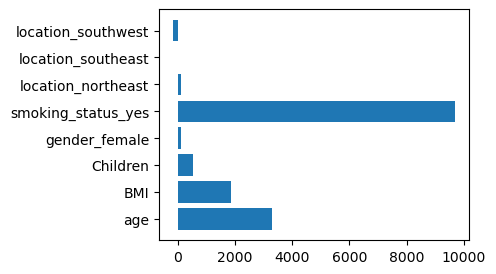

In [211]:
la=Lasso(alpha=100)
la.fit(xtrain,ytrain)
plt.figure(figsize=(4,3))
plt.barh(X.columns,la.coef_)

In [257]:
X2=X.drop(columns=['gender_female','location_northeast','location_southeast','location_southwest'],axis=1)
X2

,age,BMI,Children,smoking_status_yes
0,19.0,30.631158,0,1
1,18.0,33.770000,1,0
2,28.0,33.000000,3,0
3,33.0,22.705000,0,0
4,32.0,28.880000,0,0
...,...,...,...,...
1333,50.0,30.970000,3,0
1334,18.0,31.920000,0,0
1335,18.0,36.850000,0,0
1336,21.0,25.800000,0,0


In [258]:
xtrain2,xtest2,ytrain,ytest=train_test_split(X2,y,test_size=0.2,random_state=2)
print(xtrain2.shape)
print(ytest.shape)

(1068, 4)
(268,)


In [259]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain2=sc.fit_transform(xtrain2)
xtrain2

array([[ 1.28796162e+00, -3.15821424e-01,  2.39591007e+00,
        -5.13717165e-01],
       [-1.52909069e-01,  3.04045109e-02,  1.56727278e+00,
        -5.13717165e-01],
       [-1.23356209e+00,  3.62601882e+00, -9.00018033e-02,
         1.94659643e+00],
       ...,
       [ 1.57613576e+00,  2.10527524e+00, -9.18639095e-01,
        -5.13717165e-01],
       [ 3.02001895e-03, -8.10311574e-01, -9.00018033e-02,
        -5.13717165e-01],
       [ 1.36000516e+00,  2.82205190e-01, -9.00018033e-02,
        -5.13717165e-01]])

In [260]:
xtest2=sc.transform(xtest2)
xtest2

array([[-1.16151855, -1.13417363, -0.9186391 , -0.51371716],
       [ 1.21591809, -1.42324744, -0.9186391 , -0.51371716],
       [ 0.78365688, -0.53614702, -0.0900018 , -0.51371716],
       ...,
       [-0.58517028,  0.34515536,  0.73863549, -0.51371716],
       [-0.72925735, -0.84344324,  2.39591007, -0.51371716],
       [ 0.63956981,  0.9903946 , -0.0900018 , -0.51371716]])

In [262]:
elastic_grid=GridSearchCV(ElasticNet(),param_grid=params,scoring='r2',verbose=3)
elastic_grid.fit(xtrain2,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.799 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.777 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.778 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.671 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.95;, score=0.669 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.799 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.777 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.778 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.671 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.96;, score=0.669 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.97;, score=0.799 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.97

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': [0.95, 0.96, 0.97, 0.98, 0.99]},
             scoring='r2', verbose=3)

In [266]:
elastic_grid.best_estimator_

ElasticNet(alpha=0.4, l1_ratio=0.96)

In [267]:
elastic_HP=ElasticNet(alpha=0.4,l1_ratio=0.96)
elastic_HP.fit(xtrain2,ytrain)
print('r2_score:',r2_score(ytest,elastic_HP.predict(xtest2)))
print('mean_squared_error:',mean_squared_error(ytest,elastic_HP.predict(xtest2)))
print('RMSE:',np.sqrt(mean_squared_error(ytest,elastic_HP.predict(xtest2))))

r2_score: 0.7106239829552934
mean_squared_error: 39427001.18669037
RMSE: 6279.092385583315


Yes we do have slight increment in **r2_score and mse**

In [269]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain2,ytrain)
print('r2_score:',r2_score(ytest,rf.predict(xtest2)))
print('mean_squared_error:',mean_squared_error(ytest,rf.predict(xtest2)))

r2_score: 0.7720340215204082
mean_squared_error: 31059985.536573708


In [270]:
prandomforest={'criterion':['squared_error'],'n_estimators':[100,200,300],'max_depth':[3,4,5]}

In [271]:
random_HP=GridSearchCV(RandomForestRegressor(),param_grid=prandomforest,scoring='r2',verbose=3)
random_HP.fit(xtrain2,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.881 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.849 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.868 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.811 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.827 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=3, n_estimators=200;, score=0.878 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=3, n_estimators=200;, score=0.849 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=3, n_estimators=200;, score=0.868 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=3, n_estimators=200;, score=0.810 total time=   0.3s
[CV 5/5] END criterion=squared_

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=3)

In [272]:
random_HP.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=300)

In [273]:
rand_HP=RandomForestRegressor(max_depth=4, n_estimators=300)
rand_HP.fit(xtrain2,ytrain)
print('r2_score:',r2_score(ytest,rand_HP.predict(xtest2)))
print('mean_squared_error:',mean_squared_error(ytest,rand_HP.predict(xtest2)))

r2_score: 0.814893098229563
mean_squared_error: 25220507.59527896


In [274]:
# adjusted_r2= 1 -((1-r2)*(N-1)/(N-p-1))
N=xtest2.shape[0]
p=xtest2.shape[1]
r2=r2_score(ytest,rand_HP.predict(xtest2))
adjusted_r2= 1 -((1-r2)*(N-1)/(N-p-1))
print('adjusted_r2:',adjusted_r2)

adjusted_r2: 0.8120777841341952


Among all models created **RandomForestRegressor** was performing the best.
Here it is evident that Smoking_status has a huge impact for health_insurance price among other features 